In [74]:
import nibabel as nib
from nibabel.testing import data_path
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
import dicom


realigned_atlas = nib.load('../Data/atlas/realigned_ROI_Combined.nii').get_data()
original_atlas = nib.load('../Data/atlas/ROI_Combined.nii').get_data()
anatomical = nib.load('../Data/torso/3D/realigned_anatomical.nii').get_data()
mean_fmri = nib.load('../Data/torso/rfmri nifti/meanus258-0021-00001-000047-01.nii').get_data()


In [76]:
print(realigned_atlas.shape)
print(anatomical.shape)
print(mean_fmri.shape)

(128, 128, 47)
(128, 128, 47)
(128, 128, 47)


In [94]:
print("List of all warped ROI labels:")
print(np.unique(realigned_atlas))
print("List of all valid ROI labels:")
print(np.unique(original_atlas))
print("Number of invalid ROI labels:")
print(len(realigned_atlas < 0) + len(realigned_atlas > 19))
print("Percent invalid ROI labelled voxels")
print((len(realigned_atlas < 0) + len(realigned_atlas > 19))*100/(realigned_atlas.shape[0]*realigned_atlas.shape[1]*realigned_atlas.shape[2]
))

List of all warped ROI labels:
[-6 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 20 21 22 23 24 25 27 29]
List of all valid ROI labels:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Number of invalid ROI labels:
256
Percent invalid ROI labelled voxels
0.03324468085106383


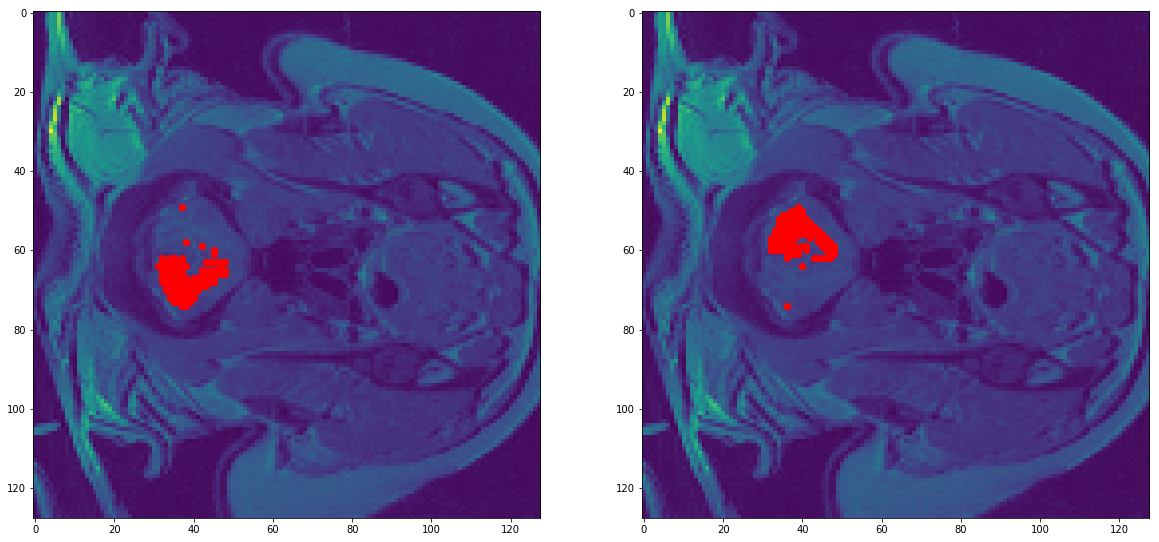

In [96]:
roi = realigned_atlas==3
roi_2 = realigned_atlas==4

slice_i = 30

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(anatomical[:,:,slice_i])
for i in range(0,roi.shape[0]-1):
    for j in range(0,roi.shape[1]-1):
        if roi[i,j,slice_i]:
            pass
            plt.scatter(x=j, y=i, c='r', s=40)
plt.subplot(1,2,2)

plt.imshow(anatomical[:,:,slice_i])
for i in range(0,roi_2.shape[0]-1):
    for j in range(0,roi_2.shape[1]-1):
        if roi_2[i,j,slice_i]:
            pass
            plt.scatter(x=j, y=i, c='r', s=40)


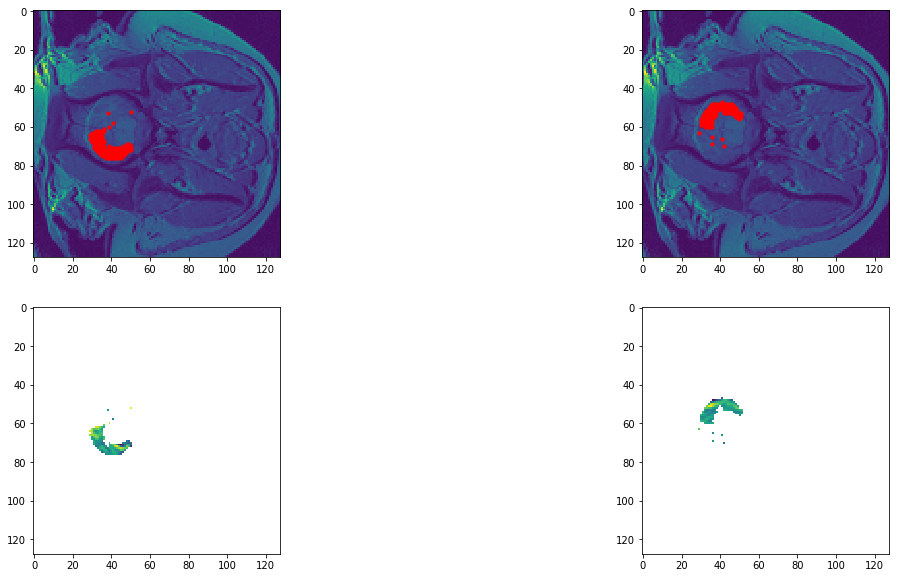

In [137]:
fmri_volume = nib.load('../Data/torso/rfmri nifti/aus258-0021-00001-001457-01.nii').get_data()
roi_left_cortex = 3
roi_right_cortex = 4
slice_i = 20

roi = realigned_atlas==roi_left_cortex
roi_2 = realigned_atlas==roi_right_cortex

mask_roi = np.ma.masked_where(realigned_atlas!=roi_left_cortex, realigned_atlas)
fmri_masked_roi = np.ma.masked_where(np.ma.getmask(mask_roi), fmri_volume) 

mask_roi_2 = np.ma.masked_where(realigned_atlas!=roi_right_cortex, realigned_atlas)
fmri_masked_roi_2 = np.ma.masked_where(np.ma.getmask(mask_roi_2), fmri_volume) 

plt.figure(figsize=(20,10))
plt.subplot(2, 2, 1)
plt.imshow(anatomical[:,:,slice_i])
for i in range(0,roi.shape[0]-1):
    for j in range(0,roi.shape[1]-1):
        if roi[i,j,slice_i]:
            pass
            plt.scatter(x=j, y=i, c='red', s=10)
plt.subplot(2,2,2)
plt.imshow(anatomical[:,:,slice_i])
for i in range(0,roi_2.shape[0]-1):
    for j in range(0,roi_2.shape[1]-1):
        if roi_2[i,j,slice_i]:
            pass
            plt.scatter(x=j, y=i, c='red', s=10)
            
plt.subplot(2, 2, 3)
plt.imshow(fmri_masked_roi[:, :, slice_i])
plt.subplot(2, 2, 4)
plt.imshow(fmri_masked_roi_2[:, :, slice_i])




